In [276]:
import numpy as np
import warnings
import IPython
import time
warnings.filterwarnings("ignore")

# Генерація функції за випадковими точками

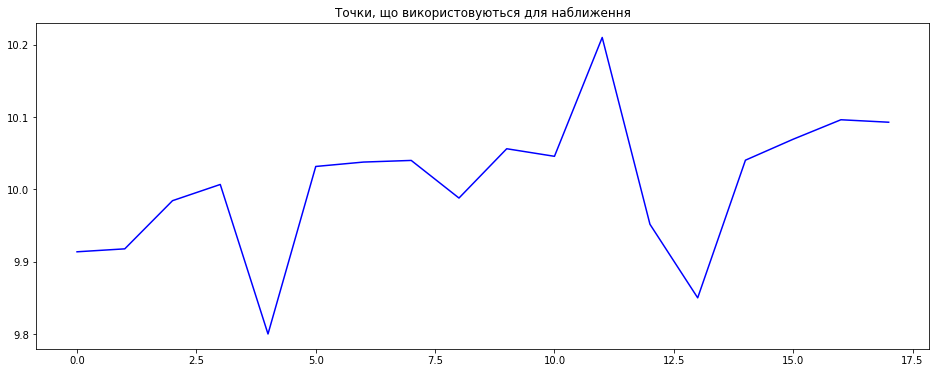

In [323]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline


y = np.array([0.99136643, 0.99177376, 0.99843616, 1.00067832, 0.98,
       1.00316741, 1.00377689, 1.00400315, 0.9988, 1.00561878,
       1.00457216, 1.02101008, 0.99517396, 0.985, 1.00403681,
       1.00693651, 1.00962929, 1.00928694]) *10  # just random from from timeseries

plt.figure(figsize=(16,6))
plt.plot(range((y).shape[0]), y , 'blue')
plt.title('Точки, що використовуються для наближення')
plt.show()

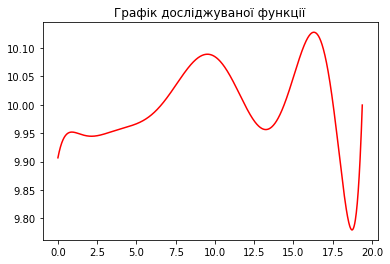

In [324]:
x = [i for i in range((y).shape[0])]
# third trend
def func(x, a,b,c,d,e,f,g,h,i,j,k,l):
    params = [a,b,c,d,e,f,g,h,i,j,k,l]
    summ = 0
    for i in range(10):
        summ+=params[i] * x**i
    return summ

popt, pcov = curve_fit(func, x, y)


x = [i/50 for i in range(1000)]


y_plot = [func(t, *popt) for t in x[:970]]

plt.plot(x[:970], y_plot, 'r-')
plt.title('Графік досліджуваної функції')
plt.show()

# Реалізація алгоритму

In [325]:
class StarAlgo():
    def __init__(self, a, b, *popt, n_pop = 10, sigma = 1, eps = 0.01, print_info = True, print_graf = True, speed=0.2):
        self.popt = popt
        self.a = a
        self.b = b
        self.sigma = sigma
        self.n_pop = n_pop
        self.eps = eps
        
        self.rang = np.linspace(self.a,self.b, num=200)
        self.y_plot = [self.func(t, self.popt) for t in self.rang]
        
        #initial population
        self.pt = [i*(self.b-self.a)/self.n_pop for i in range(10)]

        self.mm = self.b-self.a+1 # initial max distance
        self.eps = 0.01
        self.iteration = 0

        self.pr = 0
        self.best_x = 0
        self.best_y = 0
        
        self.print_info = print_info
        self.print_graf = print_graf
        self.speed = speed
        if print_info and print_graf == False:
            self.speed = 0
   
    # define function
    def func(self, x, params):
        summ = 0
        for i in range(10):
            summ+=params[i] * x**i
        return summ
    
    # random rotation algorithm
    def rand_rot(self, pop):
        # movement itself

        le = np.random.normal(0,self.sigma)

        if np.random.rand() > 0.5:
            pop = pop+le
        else:
            pop = pop-le
        # check if in range(a,b)

        if (pop<self.a):
            pop = self.b-(self.a-pop)
        elif(pop>self.b):
            pop = self.a+(pop-self.b)
        else:
            pop=pop
        return pop

    # random choice + mean algorithm
    def random_choice(self, poop):
        np.random.shuffle(poop)
        el1 = random.choice(poop)
        poop.remove(el1)
        el2 = random.choice(poop)
        poop.append(el1)
        return (el1+el2)/2
    # one iteration of algorithm
    def one_iteration(self,):
        #first population
        pz = [self.rand_rot(i) for i in self.pt]

        #secound population ps
        ps = [random_choice(self.pt) for i in range(10)]

        # concating populations
        gen_pop = self.pt+pz+ps

        # defining best by fitness function
        fitness = [self.func(t, self.popt) for t in gen_pop]
        best = np.sort(fitness)[:10]
        ind = [fitness.index(xx) for xx in best]
        best_pop = [gen_pop[i] for i in ind]
        self.pt = best_pop
        self.best_y = best[0]
        self.best_x = gen_pop[ind[0]]
        return self.pt, self.best_y, self.best_x

    # "Stop" condition
    def max_dist(self, ar):
        m = 0
        for el1 in ar:
            for el2 in ar:
                d = np.abs(el1-el2)
                if d>m:
                    m=d
        return m
    
    def show_initial_state(self,):
        plt.plot(self.rang, self.y_plot, 'r-')
        plt.scatter(self.pt, [self.func(t, self.popt) for t in self.pt] , c='green')
        plt.title('Графік досліджуваної функції та поточної популяції')
        plt.show()
        
    
    def miminize(self,):
        while (self.mm>self.eps):
            self.pt, self.best_y, self.best_x = self.one_iteration()
            self.iteration+=1
            self.mm = self.max_dist(self.pt)
            
            IPython.display.clear_output(wait=True)
            if self.print_info:
                print("Iteration -- "+str(self.iteration))
                print("Max distance between elements of population --  "+str(self.mm))
                print("Best x = "+str(self.best_x))
                print("Best y = "+str(self.best_y))
                
            if self.print_graf:
                plt.plot(self.rang, self.y_plot, 'r-')
                plt.scatter(self.pt, [self.func(t, self.popt) for t in self.pt] , c='green')
                plt.title('Графік досліджуваної функції та поточної популяції')
                plt.show()
            time.sleep(self.speed)
        

# Тестування алгоритму

In [326]:
# popt - коефіціенти многочлена визначені раніше
a = 0    # область пошуку
b = 19.4
ss = StarAlgo(a, b, *popt, n_pop = 10, sigma = 1, eps = 0.01, print_info = True, print_graf = True, speed=0.5)

### Початковий стан системи

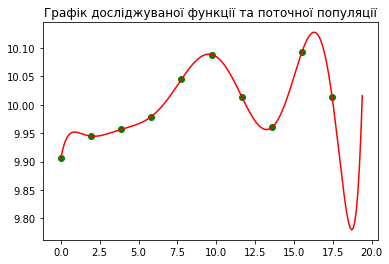

In [327]:
ss.show_initial_state()

### Робота алгоритму та його результати

Iteration -- 11
Max distance between elements of population --  0.008120506956167617
Best x = 18.723157869193088
Best y = 9.779669395233213


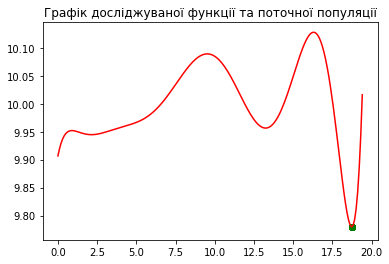

In [328]:
ss.miminize()

# FOR DRAFTS

In [195]:
# random rotation algorithm
def rand_rot(pop,sigma,a,b):
    # movement itself
    
    le = np.random.normal(0,sigma)
    
    if np.random.rand() > 0.5:
        pop = pop+le
    else:
        pop = pop-le
    # check if in range(a,b)
    
    if (pop<a):
        pop = b-(a-pop)
    elif(pop>b):
        pop = a+(pop-b)
    else:
        pop=pop
    return pop

# random choice + mean algorithm
def random_choice(poop):
    np.random.shuffle(poop)
    el1 = random.choice(poop)
    poop.remove(el1)
    el2 = random.choice(poop)
    poop.append(el1)
    return (el1+el2)/2

In [196]:
# one iteration of algorithm
def one_iteration(pt, sigma = 1):
    #first population
    pz = [rand_rot(i,sigma,a,b) for i in pt]

    #secound population ps
    ps = [random_choice(pt) for i in range(10)]

    # concating populations
    gen_pop = pt+pz+ps

    # defining best by fitness function
    fitness = [func(t, *popt) for t in gen_pop]
    best = np.sort(fitness)[:10]
    ind = [fitness.index(xx) for xx in best]
    best_pop = [gen_pop[i] for i in ind]
    best_y = best[0]
    best_x = gen_pop[ind[0]]
    return best_pop, best_y, best_x

# "Stop" condition
def max_dist(ar):
    m = 0
    for el1 in ar:
        for el2 in ar:
            d = np.abs(el1-el2)
            if d>m:
                m=d
    return m

In [ ]:
# algorithm implementation
import random
np.random.seed(0)

a = 0
b = 19.4
sigma = 1
rang = np.linspace(a,b, num=200)
y_plot = [func(t, *popt) for t in rang]
n_pop = 10

#initial population
pt = [i*(b-a)/n_pop for i in range(10)]

mm = b-a+1 # initial max distance
eps = 0.01
iteration = 0

pr = 0
x = 0
y = 0

while (mm>eps):
    pt,y,x = one_iteration(pt)
    iteration+=1
    mm = max_dist(pt)
    print("iteration -- "+str(iteration))
    print("max distance between elements of population --  "+str(mm))
    
    plt.plot(rang, y_plot, 'r-')
    plt.scatter(pt, [func(t, *popt) for t in pt] , c='green')
    plt.title('Графік досліджуваної функції та поточної популяції')
    plt.show()
    
print('Best x is '+str(x))
print('Minimum is y = '+str(y))